# Introduction
A news article discusses current or recent news of either general interest (i.e. daily newspapers) or on a specific topic (i.e. political or trade news magazines, club newsletters, or technology news websites). A news article can include accounts of eyewitnesses to the happening event. We must have seen the news divided into categories when we go to a news website. Some of the popular categories that you’ll see on almost any news website are tech, entertainment, sports, etc. If you want to know how to classify news categories using machine learning, this article is for you.

Every news website classifies the news article before publishing it so that every time visitors visit their website can easily click on the type of news that interests them. For example, I like to read the latest technology updates, so every time I visit a news website, I click on the technology section. But you may or may not like to read about technology, you may be interested in politics, business, entertainment, or maybe sports. Currently, the news articles are classified by hand by the content managers of news websites. But to save time, they can also implement a machine learning model on their websites that read the news headline or the content of the news and classifies the category of the news.

## Text Classification
Text classification datasets are used to categorize natural language texts according to content. For example, think classifying news articles by topic, or classifying book reviews based on a positive or negative response. Text classification is also helpful for language detection, organizing customer feedback, and fraud detection.

While this process is time-consuming when done manually, it can be automated with machine learning models.

Category classification, for news, is a multi-label text classification problem. The goal is to assign one or more categories to a news article. A standard technique in multi-label text classification is to use a set of binary classifiers.

## Know about Data
For the task of news classification with machine learning, I have collected a dataset from Kaggle, which contains news articles including their headlines and categories.

## Data Fields

* Article Id – Article id unique given to the record
* Article – Text of the header and article
* Category – Category of the article (tech, business, sport, entertainment, politics)
## Data Cleaning and Data Preprocessing
 Data preprocessing is the process of transforming raw data into an understandable format. It is also an important step in data mining as we cannot work with raw data. The quality of the data should be checked before applying machine learning or data mining algorithms.

## Import Libraries
let’s import the necessary Python libraries and the dataset that we need for this task.

## Data Import

In [ ]:





from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, classification_report






In [36]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


from warnings import simplefilter
simplefilter("ignore")

# Show only the 'text' and 'labels' columns with limited text width
pd.set_option('display.max_colwidth', 150)  # Adjust width as needed
#pd.set_option('display.max_colwidth',None)

In [6]:
# Load your data
df = pd.read_csv('./archive/bbc_text_cls.csv')

df[['text', 'labels']].head(5)

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December...,business
1,Dollar gains on Greenspan speech\n\nThe dollar has hit its highest level against the euro in almost three months after the Federal Reserve head sa...,business
2,Yukos unit buyer faces loan claim\n\nThe owners of embattled Russian oil giant Yukos are to ask the buyer of its former production unit to pay bac...,business
3,High fuel prices hit BA's profits\n\nBritish Airways has blamed high fuel prices for a 40% drop in profits.\n\nReporting its results for the three...,business
4,Pernod takeover talk lifts Domecq\n\nShares in UK drinks and food firm Allied Domecq have risen on speculation that it could be the target of a ta...,business


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2225 non-null   object
 1   labels  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [4]:
df['labels'].value_counts()

labels
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

In [ ]:
# Temporarily truncate the text for display purposes
#df_preview = df[['text', 'labels']].copy()
#df_preview['text'] = df_preview['text'].str.slice(0, 100) + '...'

#df_preview.head(2)

## Drop Duplicates

In [7]:
df[df.duplicated()].value_counts().sum()

98

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

## Convert Categories Name into Numerical Index
Convert the given news categories into categorical values.

In [10]:
# Associate Category names with numerical index and save it in new column CategoryId
target_category = df['labels'].unique()
print(target_category)

['business' 'entertainment' 'politics' 'sport' 'tech']


In [11]:
df['LabelId'] = df['labels'].factorize()[0]
df.head(20)

,text,labels,LabelId
0,Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December...,business,0
1,Dollar gains on Greenspan speech\n\nThe dollar has hit its highest level against the euro in almost three months after the Federal Reserve head sa...,business,0
2,Yukos unit buyer faces loan claim\n\nThe owners of embattled Russian oil giant Yukos are to ask the buyer of its former production unit to pay bac...,business,0
3,High fuel prices hit BA's profits\n\nBritish Airways has blamed high fuel prices for a 40% drop in profits.\n\nReporting its results for the three...,business,0
4,Pernod takeover talk lifts Domecq\n\nShares in UK drinks and food firm Allied Domecq have risen on speculation that it could be the target of a ta...,business,0
5,"Japan narrowly escapes recession\n\nJapan's economy teetered on the brink of a technical recession in the three months to September, figures show....",business,0
6,"Jobs growth still slow in the US\n\nThe US created fewer jobs than expected in January, but a fall in jobseekers pushed the unemployment rate to i...",business,0
7,"India calls for fair trade rules\n\nIndia, which attends the G7 meeting of seven leading industrialised nations on Friday, is unlikely to be cowed...",business,0
8,"Ethiopia's crop production up 24%\n\nEthiopia produced 14.27 million tonnes of crops in 2004, 24% higher than in 2003 and 21% more than the averag...",business,0
9,Court rejects $280bn tobacco case\n\nA US government claim accusing the country's biggest tobacco companies of covering up the effects of smoking ...,business,0


In [12]:
# Create a new pandas dataframe "category", which only has unique Categories, also sorting this list in order of CategoryId values
category = df[['labels', 'LabelId']].drop_duplicates().sort_values('LabelId')
category

,labels,LabelId
0,business,0
510,entertainment,1
896,politics,2
1313,sport,3
1824,tech,4


# Data Visualisation
### Exploratory Data Analysis (EDA)
In data mining, Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. EDA is used for seeing what the data can tell us before the modeling task. It is not easy to look at a column of numbers or a whole spreadsheet and determine important characteristics of the data. It may be tedious, boring, and/or overwhelming to derive insights by looking at plain numbers. Exploratory data analysis techniques have been devised as an aid in this situation
* Visualizing Data
  *  ta
The below graph shows the news article count for category from our dataset.

In [ ]:
#pip list | findstr numpy

In [ ]:
#pip list | findstr wordcloud

business related words:


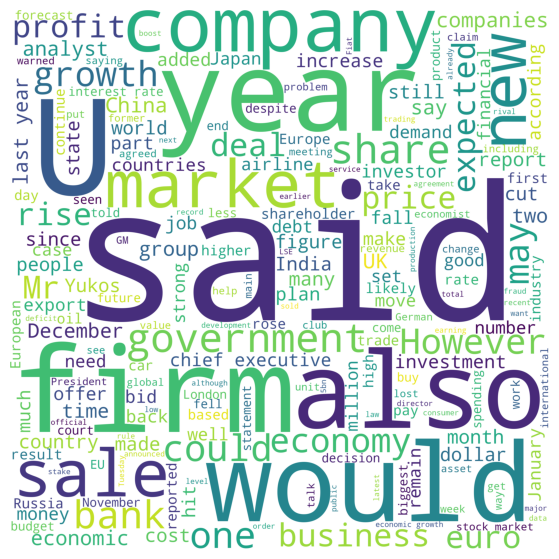

tech related words:


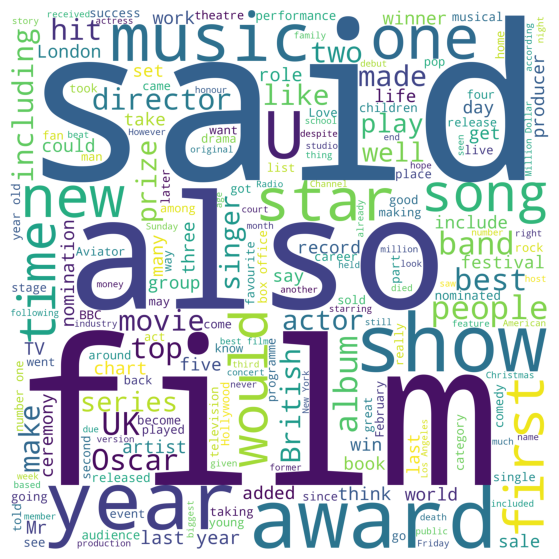

politics related words:


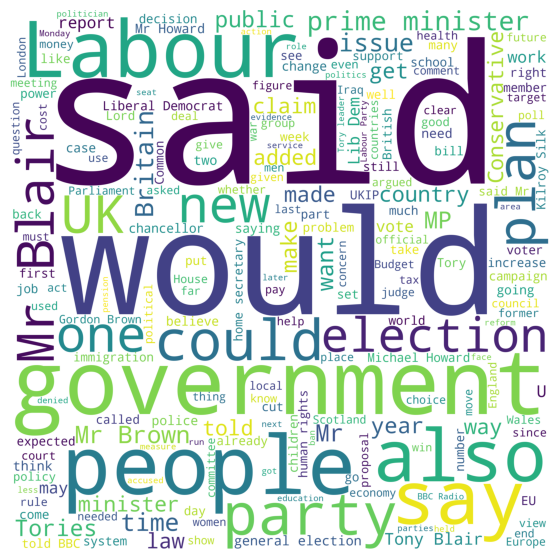

sport related words:


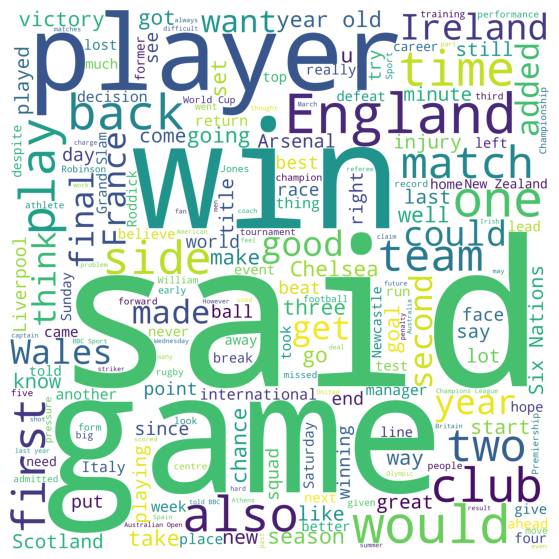

entertainment related words:


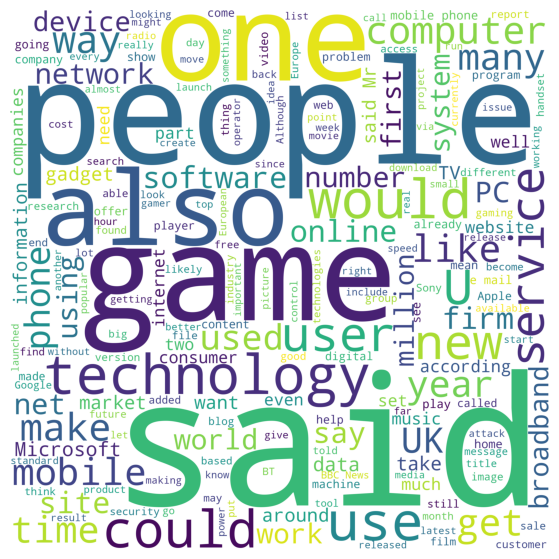

In [13]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

stop = set(stopwords.words('english'))

business = df[df['LabelId'] == 0]['text']
tech = df[df['LabelId'] == 1]['text']
politics = df[df['LabelId'] == 2]['text']
sport = df[df['LabelId'] == 3]['text']
entertainment = df[df['LabelId'] == 4]['text']


def wordcloud_draw(df, color='white'):
    words = ' '.join(df)
    
    cleaned_word = ' '.join([
        word for word in words.split()
        if word not in ['news', 'text']
    ])
    
    wordcloud = WordCloud(
        stopwords=stop,
        background_color=color,
        width=2500,
        height=2500
    ).generate(cleaned_word)

    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

print("business related words:")
wordcloud_draw(business)

print("tech related words:")
wordcloud_draw(tech)

print("politics related words:")
wordcloud_draw(politics)

print("sport related words:")
wordcloud_draw(sport)

print("entertainment related words:")
wordcloud_draw(entertainment)

(-0.5, 799.5, 399.5, -0.5)

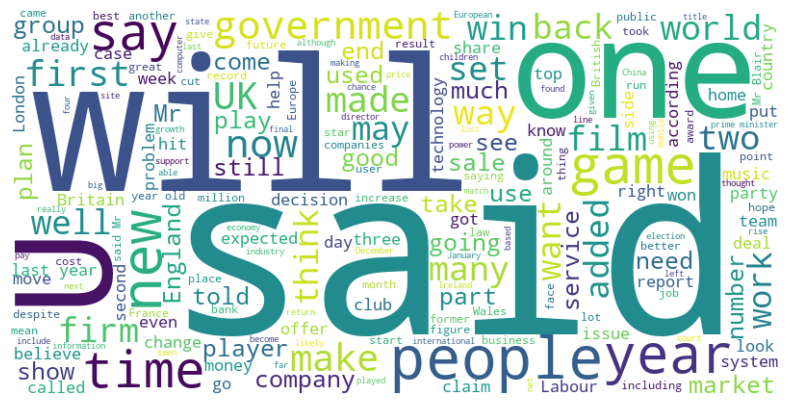

In [14]:
import string
from wordcloud import WordCloud
text = ' '.join(df['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [15]:
from collections import Counter
def get_word_counts(text_data):
  all_words = []
  for text in text_data:
    # Remove punctuation marks
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    all_words.extend(words) 
  word_counts = Counter(all_words)
  word_freq = pd.DataFrame({'word': list(word_counts.keys()), 'count': list(word_counts.values())})
  word_freq = word_freq.sort_values(by='count', ascending=False)
  return word_freq

word_freq = get_word_counts(df['text'])
word_freq.head(10)

,word,count
19,the,42716
15,to,23757
32,of,18918
41,and,17163
58,a,16527
35,in,15946
18,for,8330
29,is,8183
26,The,7643
66,that,7378


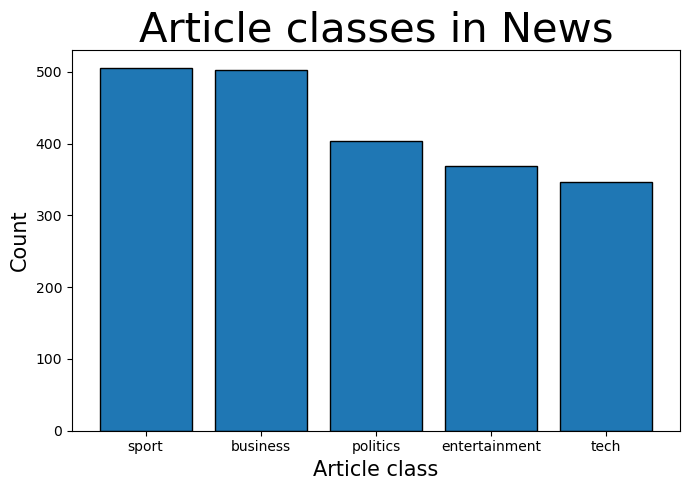

In [16]:
article_count = df.groupby('labels')['labels'].count().reset_index(name='count').sort_values(by='count',ascending=False)

plt.figure(figsize=(7,5))

plt.bar(data=article_count,x='labels',
        height='count' , edgecolor='black')

plt.xlabel('Article class',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Article classes in News',fontsize=30)

plt.tight_layout()

Text(0.5, 1.0, 'Proportions of Category Labels')

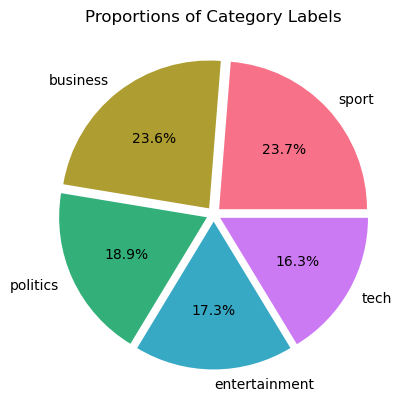

In [19]:
#set seaborn palette to a 5 color wheel
sns.set_palette('husl', 5) 
#plot the category value counts as a pie chart
df['labels'].value_counts().plot.pie(autopct = '%.1f%%', explode = [.05]*5)
#remove the y label because it looks goofy
plt.ylabel('')
#add a title
plt.title('Proportions of Category Labels')

* What is Gini Index?

Gini Index or Gini impurity measures the degree or probability of a particular variable being wrongly classified when it is randomly chosen.

* But what is actually meant by ‘impurity’?

If all the elements belong to a single class, then it can be called pure. The degree of Gini Index varies between 0 and 1,

where
'0' denotes that all elements belong to a certain class or there exists only one class (pure), and
'1' denotes that the elements are randomly distributed across various classes (impure).

A Gini Index of '0.5 'denotes equally distributed elements into some classes.

In [20]:
gini_max = 1 - 1/5
gini = 1 - np.power(df['labels'].value_counts()/df.count().max(), 2).sum()
gini_str = f"The training data has a Gini Index of {gini:.3f}.\n\
This is very close to the maximum value for 5 classes of {gini_max}\n\
So it can be concluded that the classes are well balanced."
print(gini_str)

The training data has a Gini Index of 0.795.
This is very close to the maximum value for 5 classes of 0.8
So it can be concluded that the classes are well balanced.


In [21]:
#helper function to plot word clouds for each category
def plot_word_clouds(df, col):
    '''
    df: dataframe object with articles
    col: string identifying the article column
    returns None
    '''

    #group df by Category and concatenate all of the articles in each category
    text_by_cat = df.groupby('labels')[col].apply(' '.join)
    #create a 3 x 2 figure with shared x and y axes
    fig, axes = plt.subplots(3, 2, figsize = (16, 8), sharex = True, sharey = True, facecolor = '#B1D6EB')
    #flatten the axes list
    axes = [ax for ax_list in axes for ax in ax_list]
    #create dictionary to hold word clouds
    clouds = {}
    #iterate over categories with text
    for i, (cat, text) in enumerate(text_by_cat.items()):
        #create WordCloud object
        word_cloud = WordCloud(width = 400, height = 125, 
                               background_color = '#55AFE2',
                               colormap = 'copper',
                               collocations = False
                               )
        #plot word cloud on the ith axis                    
        axes[i].imshow(word_cloud.generate(text))
        #set title to Category
        axes[i].set_title(f'{cat.capitalize()} Word Cloud')
        #do not show x and y axis
        axes[i].axis('off')
    #turn off the unused axis
    axes[5].axis('off')

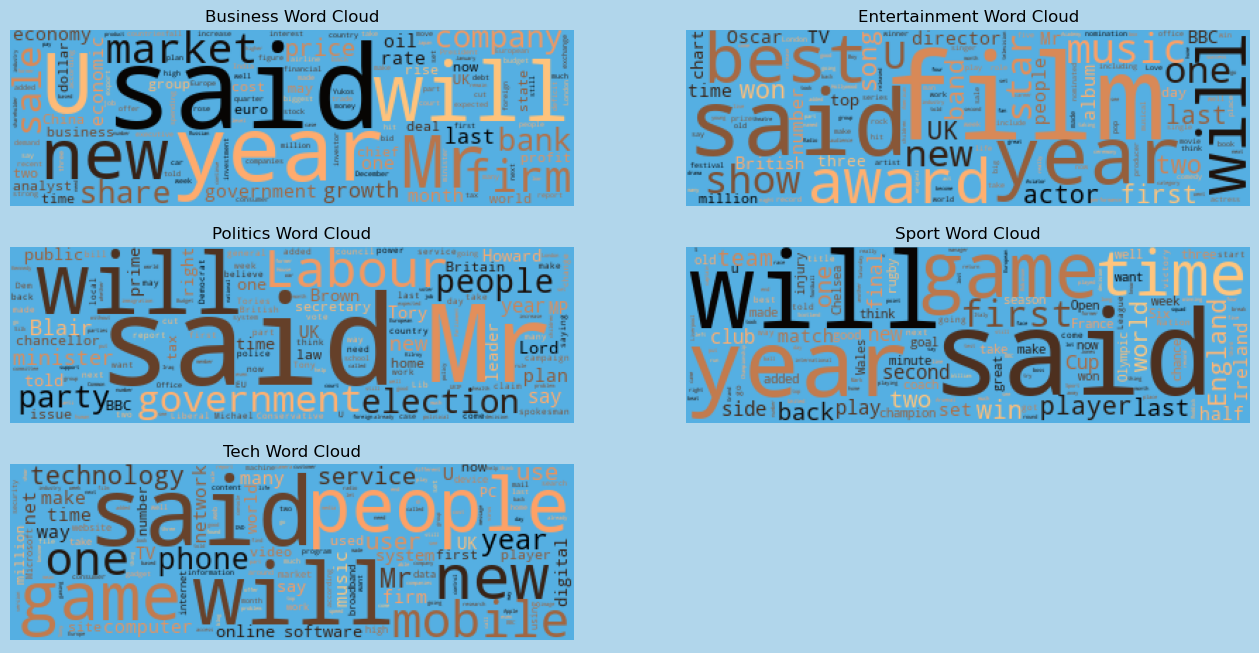

In [22]:
plot_word_clouds(df, 'text')

# Data Preproccesing

## Remove Tags function

In [23]:
df.head(2)

,text,labels,LabelId
0,Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December...,business,0
1,Dollar gains on Greenspan speech\n\nThe dollar has hit its highest level against the euro in almost three months after the Federal Reserve head sa...,business,0


In [24]:
import re
def remove_tags(text):
  remove = re.compile(r'')
  return re.sub(remove, '', text)
df['text'] = df['text'].apply(remove_tags)

In [25]:
df.head(2)

,text,labels,LabelId
0,Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December...,business,0
1,Dollar gains on Greenspan speech\n\nThe dollar has hit its highest level against the euro in almost three months after the Federal Reserve head sa...,business,0


## Remove special character function

In [26]:
def special_char(text):
  reviews = ''
  for x in text:
    if x.isalnum():
      reviews = reviews + x
    else:
      reviews = reviews + ' '
  return reviews
df['text'] = df['text'].apply(special_char)

In [27]:
df.head(2)

,text,labels,LabelId
0,Ad sales boost Time Warner profit Quarterly profits at US media giant TimeWarner jumped 76 to 1 13bn 600m for the three months to December ...,business,0
1,Dollar gains on Greenspan speech The dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said...,business,0


## Convert Characters to lower case function

In [28]:
def convert_lower(text):
   return text.lower()
df['text'] = df['text'].apply(convert_lower)

In [29]:
df.head(2)

,text,labels,LabelId
0,ad sales boost time warner profit quarterly profits at us media giant timewarner jumped 76 to 1 13bn 600m for the three months to december ...,business,0
1,dollar gains on greenspan speech the dollar has hit its highest level against the euro in almost three months after the federal reserve head said...,business,0


## Remove stopwords from text function

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')   

In [32]:
def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text)
  return [x for x in words if x not in stop_words]
df['text'] = df['text'].apply(remove_stopwords)

In [33]:
df.head(2)

,text,labels,LabelId
0,"[ad, sales, boost, time, warner, profit, quarterly, profits, us, media, giant, timewarner, jumped, 76, 1, 13bn, 600m, three, months, december, 639...",business,0
1,"[dollar, gains, greenspan, speech, dollar, hit, highest, level, euro, almost, three, months, federal, reserve, head, said, us, trade, deficit, set...",business,0


## Lemmatize the words function

In [34]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')   # recommended for full lemmatization support

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rehim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rehim\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [37]:
def lemmatize_word(text):
  wordnet = WordNetLemmatizer()
  return " ".join([wordnet.lemmatize(word) for word in text])
df['text'] = df['text'].apply(lemmatize_word)

In [38]:
df.head(2)

,text,labels,LabelId
0,ad sale boost time warner profit quarterly profit u medium giant timewarner jumped 76 1 13bn 600m three month december 639m year earlier firm one ...,business,0
1,dollar gain greenspan speech dollar hit highest level euro almost three month federal reserve head said u trade deficit set stabilise alan greensp...,business,0


In [39]:
df['labels'].value_counts()

labels
sport            505
business         503
politics         403
entertainment    369
tech             347
Name: count, dtype: int64

## After Cleaning Text in our Dataset

In [40]:
df

,text,labels,LabelId
0,ad sale boost time warner profit quarterly profit u medium giant timewarner jumped 76 1 13bn 600m three month december 639m year earlier firm one ...,business,0
1,dollar gain greenspan speech dollar hit highest level euro almost three month federal reserve head said u trade deficit set stabilise alan greensp...,business,0
2,yukos unit buyer face loan claim owner embattled russian oil giant yukos ask buyer former production unit pay back 900m 479m loan state owned rosn...,business,0
3,high fuel price hit ba profit british airway blamed high fuel price 40 drop profit reporting result three month 31 december 2004 airline made pre ...,business,0
4,pernod takeover talk lift domecq share uk drink food firm allied domecq risen speculation could target takeover france pernod ricard report wall s...,business,0
...,...,...,...
2219,new console promise big problem making game future console require graphic artist money industry conference told sony microsoft nintendo debut new...,tech,4
2220,bt program beat dialler scam bt introducing two initiative help beat rogue dialler scam cost dial net user thousand may dial net user able downloa...,tech,4
2222,careful code new european directive could put software writer risk legal action warns former programmer technology analyst bill thompson get way d...,tech,4
2223,u cyber security chief resigns man making sure u computer network safe secure resigned year post amit yoran director national cyber security divis...,tech,4


# ML Modeling

## Create and Fit Bag of Words Model
  
* In this step, we construct a vector, which would tell us whether a word in each sentence is a frequent word or not. If a word in a sentence is a frequent word, we set it as 1, else we set it as 0.
* Whenever we apply any algorithm in NLP, it works on numbers. We cannot directly feed our text into that algorithm. Hence, the Bag of Words model is used to preprocess the text by converting it into a bag of words, which keeps a count of the total occurrences of the most frequently used words.

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

x = np.array(df.iloc[:,0].values)
y = np.array(df.LabelId.values)

cv = CountVectorizer(max_features = 5000)

x = cv.fit_transform(df.text).toarray()

print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (2127, 5000)
y.shape =  (2127,)


## Train Test and Split the Dataset
We need to split a dataset into train and test sets to evaluate how well our machine learning model performs. The train set is used to fit the model, the statistics of the train set are known. The second set is called the test data set, this set is solely used for predictions.



In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))

1488
639


# Create an empty string

In [43]:
#create list of model and accuracy dicts
perform_list = [ ]

# Create, Fit and Predict all ML Model

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support


def run_model(model_name, est_c=None, est_pnlty=None):

    if model_name == 'Logistic Regression':
        mdl = LogisticRegression(C=est_c if est_c else 1.0,
                                 penalty=est_pnlty if est_pnlty else 'l2',
                                 max_iter=1000)

    elif model_name == 'Random Forest':
        mdl = RandomForestClassifier(
            n_estimators=100,
            criterion='entropy',
            random_state=0
        )

    elif model_name == 'Multinomial Naive Bayes':
        mdl = MultinomialNB(alpha=1.0, fit_prior=True)

    elif model_name == 'Support Vector Classifier':
        mdl = SVC(probability=True)

    elif model_name == 'Decision Tree Classifier':
        mdl = DecisionTreeClassifier()

    elif model_name == 'K Nearest Neighbour':
        mdl = KNeighborsClassifier(
            n_neighbors=10,
            metric='minkowski',
            p=4
        )

    elif model_name == 'Gaussian Naive Bayes':
        mdl = GaussianNB()

    else:
        raise ValueError("Model name not recognized!")

    # Fit model
    mdl.fit(x_train, y_train)

    # Predict
    y_pred = mdl.predict(x_test)

    # Metrics
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    precision, recall, f1score, _ = precision_recall_fscore_support(
        y_test, y_pred, average='micro'
    )

    print(f'\nTest Accuracy Score of {model_name}: {accuracy}%')
    print(f'Precision : {round(precision, 2)}')
    print(f'Recall : {round(recall, 2)}')
    print(f'F1-score : {round(f1score, 2)}')

    perform_list.append({
        'Model': model_name,
        'Test Accuracy': accuracy,
        'Precision': round(precision, 2),
        'Recall': round(recall, 2),
        'F1': round(f1score, 2)
    })

## Each Models Evaluation

In [45]:
run_model('Logistic Regression', est_c=None, est_pnlty=None)


Test Accuracy Score of Logistic Regression: 96.71%
Precision : 0.97
Recall : 0.97
F1-score : 0.97


In [46]:
run_model('Random Forest', est_c=None, est_pnlty=None)


Test Accuracy Score of Random Forest: 95.77%
Precision : 0.96
Recall : 0.96
F1-score : 0.96


In [47]:
run_model('Multinomial Naive Bayes', est_c=None, est_pnlty=None)


Test Accuracy Score of Multinomial Naive Bayes: 97.34%
Precision : 0.97
Recall : 0.97
F1-score : 0.97


In [48]:
run_model('Decision Tree Classifier', est_c=None, est_pnlty=None)


Test Accuracy Score of Decision Tree Classifier: 82.47%
Precision : 0.82
Recall : 0.82
F1-score : 0.82


In [49]:
run_model('K Nearest Neighbour', est_c=None, est_pnlty=None)


Test Accuracy Score of K Nearest Neighbour: 78.56%
Precision : 0.79
Recall : 0.79
F1-score : 0.79


In [50]:
run_model('Gaussian Naive Bayes', est_c=None, est_pnlty=None)


Test Accuracy Score of Gaussian Naive Bayes: 89.98%
Precision : 0.9
Recall : 0.9
F1-score : 0.9


In [ ]:
run_model('Support Vector Classifier', est_c=None, est_pnlty=None)

## Create Dataframe of Model, Accuracy, Precision, Recall, and F1

In [ ]:
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_performance

## Best Model to Perform Accuracy Score
Here, after training and testing the model we find that Random Forest Classifier model has given the best accuracy from all machine learning models.

In [ ]:
model_name = model_performance.loc[
    model_performance["Test Accuracy"].idxmax(),
    "Model"
]
model = model_performance["Model"]

max_value = model_performance["Test Accuracy"].max()

print("The best accuracy of model is", max_value,"from ",model_name,)

## Fit & predict best ML Model
Here we fit and predict our best model i.e. Random Forest.

In [ ]:
classifier = MultinomialNB(alpha=1.0, fit_prior=True).fit(x_train, y_train)
classifier
y_pred = classifier.predict(x_test)

## Predict News Article
Now, here, after the completion of model analysis, we can also predict any news articles.

In [ ]:
# Example texts
test_texts = [
    "Stock markets in Europe are recovering after a week of losses triggered by inflation concerns.",
    "Apple is rumored to unveil its first mixed-reality headset at the upcoming conference.",
    "The government passed a new healthcare bill aimed at reducing the cost of medical services.",
    "Novak Djokovic clinched another Grand Slam title in a thrilling final match.",
    "Marvel Studios announced the next phase of its cinematic universe with new heroes and storylines."
]
y_pred_transformed = cv.transform(test_texts)

# Predict all at once
predictions = classifier.predict(y_pred_transformed)

# Label mapping
label_map = {
    0: "Business News",
    1: "Tech News",
    2: "Politics News",
    3: "Sports News",
    4: "Entertainment News"
}

# Print results
for text, pred in zip(test_texts, predictions):
    print(f"» {label_map[pred]:18} : {text}")

In [ ]:
# Example texts
test_texts = [
    """International Summit Focuses on Cybersecurity Cooperation.
    World leaders gathered for a two-day summit addressing the growing threat of cyberattacks.
    Delegates discussed joint defense strategies and shared intelligence mechanisms.
    Officials emphasized the importance of cross-border collaboration in protecting digital infrastructure."""
]

y_pred_transformed = cv.transform(test_texts)

# Predict all at once
predictions = classifier.predict(y_pred_transformed)

# Label mapping
label_map = {
    0: "Business News",
    1: "Tech News",
    2: "Politics News",
    3: "Sports News",
    4: "Entertainment News"
}

# Print results
for text, pred in zip(test_texts, predictions):
    print(f"» {label_map[pred]:18} : {text}")

In [ ]:
y_pred1 = cv.transform(['Hour ago, I contemplated retirement for a lot of reasons.I felt like people were not sensitive enough to my injuries. I felt like a lot of people were backed, why not me? I have done no less. I have won a lot of games for the team, and I am not feeling backed, said Ashwin'])
yy = classifier.predict(y_pred1)
result = ""
if yy == [0]:
  result = "Business News"
elif yy == [1]:
  result = "Tech News"
elif yy == [2]:
  result = "Politics News"
elif yy == [3]:
  result = "Sports News"
elif yy == [1]:
  result = "Entertainment News"
print(result)

### Conclusion
Finally after doing Data cleaning and Data Preprocessing (cleaning data, train_test_split model, creating a bag of words NLP model, and machine learning model) we got the accuracy scores and we can say that Random Forest Classification gives the best accuracy among all machine learning models.
* And at last, we also predict the category of different news articles.

# Different style of approach

## Pipeline of different ML algorithms

In [ ]:
pipeMNB = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1,3))),('MNB', MultinomialNB())])
pipeCNB = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1,3))),('CNB', ComplementNB())])
pipeSVC = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1,3))),('SVC', LinearSVC())])

In [ ]:
pipeMNB.fit(X_train,y_train)
predictMNB = pipeMNB.predict(X_test)

In [ ]:
predictMNB
print(f'MNB : {accuracy_score(y_test,predictMNB):.2f}')

## Test results for hyperparamets for best outcome

In [ ]:
accuracy_score(y_test,predictMNB)

In [ ]:
pipeMNB.fit(X_train,y_train)
predictMNB = pipeMNB.predict(X_test)
print(f'MultinomialNB : {accuracy_score(y_test,predictMNB):.2f}')
pipeCNB.fit(X_train,y_train)
predictCNB = pipeCNB.predict(X_test)
print(f'ComplementNB : {accuracy_score(y_test,predictCNB):.2f}')
pipeSVC.fit(X_train,y_train)
predictSVC = pipeSVC.predict(X_test)
print(f'LinearSVC : {accuracy_score(y_test,predictSVC):.2f}')

In [ ]:

results = []
results.append(get_metrics(y_test, predictMNB, "MultinomialNB"))
results.append(get_metrics(y_test, predictCNB, "ComplementNB"))
results.append(get_metrics(y_test, predictSVC, "LinearSVC"))

In [ ]:
# Display the summary table
headers = ["Model", "Accuracy", "Precision (0/1)", "Recall (0/1)", "F1 Score (0/1)"]
print("\nClassification Summary Table:")
print(tabulate(results, headers=headers, tablefmt="psql"))

In [ ]:
print(classification_report(y_test, predictMNB))

In [ ]:
print(classification_report(y_test, predictCNB))

In [ ]:
print(classification_report(y_test, predictSVC))

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
from tabulate import tabulate

# Function to extract metrics from classification report
def get_metrics(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    acc = accuracy_score(y_true, y_pred)
    precision = f"{report[0]['precision']:.2f} / {report[1]['precision']:.2f}"
    recall = f"{report[0]['recall']:.2f} / {report[1]['recall']:.2f}"
    f1 = f"{report[0]['f1-score']:.2f} / {report[1]['f1-score']:.2f}"
    return [model_name, f"{acc:.2f}", precision, recall, f1]

# Fit and predict
pipeMNB.fit(X_train, y_train)
predictMNB = pipeMNB.predict(X_test)

pipeCNB.fit(X_train, y_train)
predictCNB = pipeCNB.predict(X_test)

pipeSVC.fit(X_train, y_train)
predictSVC = pipeSVC.predict(X_test)

# Compile results
results = []
results.append(get_metrics(y_test, predictMNB, "MultinomialNB"))
results.append(get_metrics(y_test, predictCNB, "ComplementNB"))
results.append(get_metrics(y_test, predictSVC, "LinearSVC"))

# Display the summary table
headers = ["Model", "Accuracy", "Precision (0/1)", "Recall (0/1)", "F1 Score (0/1)"]
print("\nClassification Summary Table:")
print(tabulate(results, headers=headers, tablefmt="psql"))

## Test some examples to see how model predicts

In [ ]:
text = 'Google announced its latest AI-powered search engine upgrade, claiming it will revolutionize search results.'

predict = pipeSVC.predict([text])

print(predict)

In [ ]:
# Example texts for testing
test_texts = [
    "Stock markets in Europe are recovering after a week of losses triggered by inflation concerns.",
    "Apple is rumored to unveil its first mixed-reality headset at the upcoming conference.",
    "The government passed a new healthcare bill aimed at reducing the cost of medical services.",
    "Novak Djokovic clinched another Grand Slam title in a thrilling final match.",
    "Marvel Studios announced the next phase of its cinematic universe with new heroes and storylines."
]

# Transform and predict for each example
predictions = pipeSVC.predict(test_texts)
for txt, text in zip(test_texts, predictions):
    print(f"» {text.upper():11} : {txt}")